In [1]:
# Description: An example of how to use the AutoEncodingFramework
import os
os.chdir("../")
# import sys
# sys.path.append("../")
from utils.visualization import SeriesPlotter

In [2]:
import torch

# Step 1. Choose a dataset (L.LightningDataModule)
from data.bearing_fault_prediction.raw.fault_prediction_datamodule import (
    FaultPredictionDataModule,
)

datamodule = FaultPredictionDataModule(batch_size=40)

z_score sample transform initialized.

In [3]:
# Step 2. Choose a model (AutoEncodingFramework from models.autoencoding_models)
from model.autoencoding_models.autoencoding_models import PatchTSTAutoEncodingModel

model = PatchTSTAutoEncodingModel(
    in_features=1,
    d_model=64,
    patch_size=16,
    patch_stride=16,
    num_layers=4,
    dropout=0.1,
    nhead=4,
    activation="relu",
    additional_tokens_at_last=0,
    norm_first=True,
    # logging params
    every_n_epochs=50,
    figsize=(30, 5),
    dpi=300,
    # training params
    mask_ratio=0,
    lr=1e-5,
    max_epochs=50,
    max_steps=-1,
)

/home/sunluohao/.conda/envs/lightning/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [4]:
# Step 3. model trains itself with the datamodule
model.fit(datamodule)
model.test(datamodule)

Preparing datasets...

Output()

datasets prepared.

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                                                     ┃ Type                            ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ backbone                                                 │ PatchTSTBackbone                │  201 K │
│ 1  │ backbone.token_emb                                       │ PatchEmbedding                  │  1.1 K │
│ 2  │ backbone.token_emb.token_emb                             │ Conv1d                          │  1.1 K │
│ 3  │ backbone.pos_emb                                         │ SinPosEmbedding                 │      0 │
│ 4  │ backbone.transformer_encoder                             │ TransformerEncoder              │  199 K │
│ 5  │ backbone.transformer_encoder.layers                      │ ModuleList                      │  199 K │
│ 6  │ backbone.transformer_encoder.layers.0                    │ TransformerEncoderLayer         │ 50.0 K │
│ 7  │ backbone.transformer_encoder.layers.0.self_attn          │ MultiheadAttention              │ 16.6 K │
│ 8  │ backbone.transformer_encoder.layers.0.self_attn.out_proj │ NonDynamicallyQuantizableLinear │  4.2 K │
│ 9  │ backbone.transformer_encoder.layers.0.linear1            │ Linear                          │ 16.6 K │
│ 10 │ backbone.transformer_encoder.layers.0.dropout            │ Dropout                         │      0 │
│ 11 │ backbone.transformer_encoder.layers.0.linear2            │ Linear                          │ 16.4 K │
│ 12 │ backbone.transformer_encoder.layers.0.norm1              │ LayerNorm                       │    128 │
│ 13 │ backbone.transformer_encoder.layers.0.norm2              │ LayerNorm                       │    128 │
│ 14 │ backbone.transformer_encoder.layers.0.dropout1           │ Dropout                         │      0 │
│ 15 │ backbone.transformer_encoder.layers.0.dropout2           │ Dropout                         │      0 │
│ 16 │ backbone.transformer_encoder.layers.0.activation         │ ReLU                            │      0 │
│ 17 │ backbone.transformer_encoder.layers.1                    │ TransformerEncoderLayer         │ 50.0 K │
│ 18 │ backbone.transformer_encoder.layers.1.self_attn          │ MultiheadAttention              │ 16.6 K │
│ 19 │ backbone.transformer_encoder.layers.1.self_attn.out_proj │ NonDynamicallyQuantizableLinear │  4.2 K │
│ 20 │ backbone.transformer_encoder.layers.1.linear1            │ Linear                          │ 16.6 K │
│ 21 │ backbone.transformer_encoder.layers.1.dropout            │ Dropout                         │      0 │
│ 22 │ backbone.transformer_encoder.layers.1.linear2            │ Linear                          │ 16.4 K │
│ 23 │ backbone.transformer_encoder.layers.1.norm1              │ LayerNorm                       │    128 │
│ 24 │ backbone.transformer_encoder.layers.1.norm2              │ LayerNorm                       │    128 │
│ 25 │ backbone.transformer_encoder.layers.1.dropout1           │ Dropout                         │      0 │
│ 26 │ backbone.transformer_encoder.layers.1.dropout2           │ Dropout                         │      0 │
│ 27 │ backbone.transformer_encoder.layers.1.activation         │ ReLU                            │      0 │
│ 28 │ backbone.transformer_encoder.layers.2                    │ TransformerEncoderLayer         │ 50.0 K │
│ 29 │ backbone.transformer_encoder.layers.2.self_attn          │ MultiheadAttention              │ 16.6 K │
│ 30 │ backbone.transformer_encoder.layers.2.self_attn.out_proj │ NonDynamicallyQuantizableLinear │  4.2 K │
│ 31 │ backbone.transformer_encoder.layers.2.linear1            │ Linear                          │ 16.6 K │
│ 32 │ backbone.transformer_encoder.layers.2.dropout            │ Dropout                         │      0 │
│ 33 │ backbone.transformer_encoder.layers.2.linear2            │ Linear    

Trainable params: 206 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 206 K                                                                                                
Total estimated model params size (MB): 0

Output()

=======================================
=       Hyperparameters Logged.       =
=======================================
Hyperparameters:
"activation":                relu
"additional_tokens_at_last": 0
"d_model":                   64
"dpi":                       300
"dropout":                   0.1
"every_n_epochs":            50
"figsize":                   (30, 5)
"in_features":               1
"loss_type":                 full
"lr":                        1e-05
"mask_length":               1
"mask_ratio":                0
"max_epochs":                50
"max_steps":                 -1
"nhead":                     4
"norm_first":                True
"num_layers":                4
"patch_size":                16
"patch_stride":              16

=======================================
=        Tensorboard Activated.       =
=======================================
Open http://localhost:6006/ to view the training process.
tensorboard PID: 429166

`Trainer.fit` stopped: `max_epochs=50` reached.


/home/sunluohao/.conda/envs/lightning/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: 
enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


=======================================
=        Checkpoint Loaded.          =
=======================================
Best validation loss: 0.050191961228847504 at epoch 49
Checkpoint saved at: 
/home/sunluohao/Transformers-for-Time-Series/lightning_logs/version_2/checkpoints/epoch=49-step=3500.ckpt

=======================================
=      Tensorboard Dectivated.        =
=======================================

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.050312962383031845    │
└───────────────────────────┴───────────────────────────┘

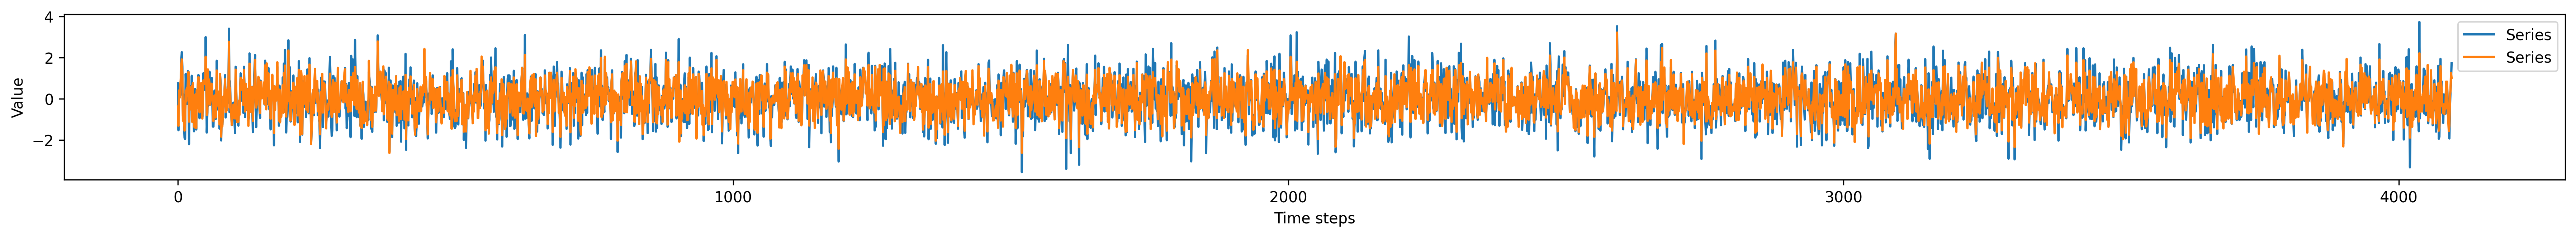

In [5]:
# Step 4. model predicts
sample_data = torch.randn(4, 4096, 1)

encoded = model.encode(sample_data)  # same as model.backbone(sample_data)
decoded = model.decode(encoded)  # same as model.head(encoded)
SeriesPlotter.plot_and_show([sample_data, decoded], figsize=(30, 2))